In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
examples = pd.read_csv('data/imdb_example_new.csv')
data_test = pd.read_csv('data/test_results_variance_feature_attribution_mivolo_checkpoint.csv')
data_test["filename"] = data_test["filename"].apply(lambda x: f"{x.split('/')[-2]}/{x.split('/')[-1]}")
examples_names = set(examples.img_name)

data_examples = data_test[data_test.filename.isin(examples_names)]
data_test = data_test[~data_test.filename.isin(examples_names)]
data_recalibration= data_test.sample(frac=0.8)
data_validation = data_test.drop(data_recalibration.index)
data_validation = pd.concat([data_validation, data_examples])
pred_mean = data_recalibration["age_pred"].values
pred_std = np.sqrt(data_recalibration["age_var"].values)
y = data_recalibration["age_target"].values


pred_std_val = np.sqrt(data_validation["age_var"].values)
y_val = data_validation["age_target"].values
pred_mean_val = data_validation["age_pred"].values

In [2]:
import uncertainty_toolbox as uct
calibrator = uct.recalibration.get_std_recalibrator(y_mean = pred_mean, y_std=pred_std, y_true=y)

In [3]:
new_std = calibrator(pred_std)

In [4]:
new_std_val = calibrator(pred_std_val)
data_validation["std_calibrated"] = new_std_val

Before Recalibration:  MACE: 0.04810, RMSCE: 0.05300, MA: 0.04858


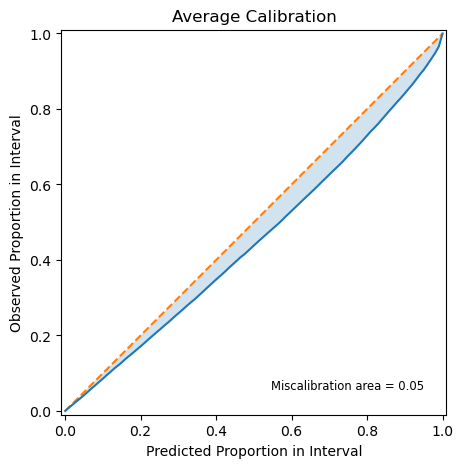

In [5]:
exp_props, obs_props = uct.get_proportion_lists_vectorized(
    pred_mean, pred_std, y
)
mace = uct.mean_absolute_calibration_error(
    pred_mean, pred_std, y, recal_model=None
)
rmsce = uct.root_mean_squared_calibration_error(
    pred_mean, pred_std, y, recal_model=None
)
ma = uct.miscalibration_area(pred_mean, pred_std, y, recal_model=None)
print("Before Recalibration:  ", end="")
print("MACE: {:.5f}, RMSCE: {:.5f}, MA: {:.5f}".format(mace, rmsce, ma))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
uct.plot_calibration(
    pred_mean,
    pred_std,
    y,
    exp_props=exp_props,
    obs_props=obs_props,
    ax=ax,

)
#save as pdf tight
plt.savefig("calibration_before_recalibration.pdf", bbox_inches='tight')
plt.show()


Before Recalibration:  MACE: 0.00110, RMSCE: 0.00187, MA: 0.00110


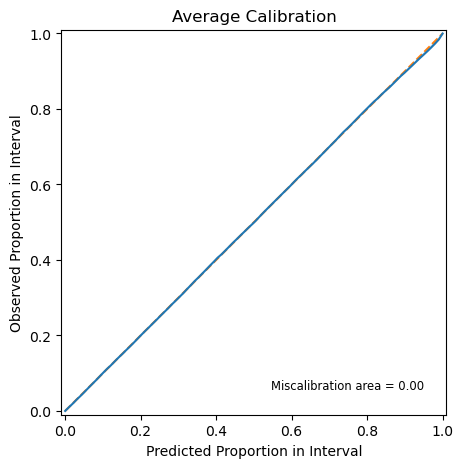

In [6]:
exp_props, obs_props = uct.get_proportion_lists_vectorized(
    pred_mean, new_std, y
)
mace = uct.mean_absolute_calibration_error(
    pred_mean, new_std, y, recal_model=None
)
rmsce = uct.root_mean_squared_calibration_error(
    pred_mean, new_std, y, recal_model=None
)
ma = uct.miscalibration_area(pred_mean, new_std, y, recal_model=None)
print("Before Recalibration:  ", end="")
print("MACE: {:.5f}, RMSCE: {:.5f}, MA: {:.5f}".format(mace, rmsce, ma))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
uct.plot_calibration(
    pred_mean,
    new_std,
    y,
    exp_props=exp_props,
    obs_props=obs_props,
    ax=ax,
)
plt.show()


Before Recalibration:  MACE: 0.00374, RMSCE: 0.00429, MA: 0.00378


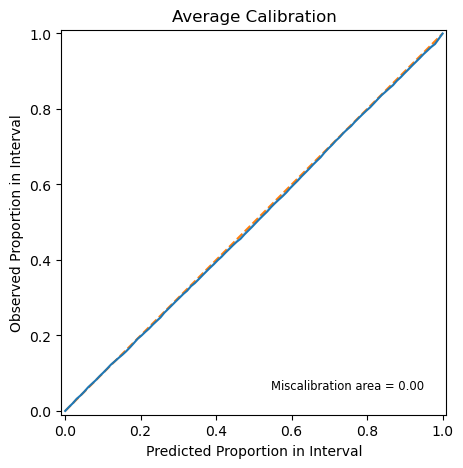

In [7]:
exp_props, obs_props = uct.get_proportion_lists_vectorized(
    pred_mean_val, new_std_val, y_val
)
mace = uct.mean_absolute_calibration_error(
    pred_mean_val, new_std_val, y_val, recal_model=None
)
rmsce = uct.root_mean_squared_calibration_error(
    pred_mean_val, new_std_val, y_val, recal_model=None
)
ma = uct.miscalibration_area(pred_mean_val, new_std_val, y_val, recal_model=None)
print("Before Recalibration:  ", end="")
print("MACE: {:.5f}, RMSCE: {:.5f}, MA: {:.5f}".format(mace, rmsce, ma))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
uct.plot_calibration(
    pred_mean_val,
    new_std_val,
    y_val,
    exp_props=exp_props,
    obs_props=obs_props,
    ax=ax,
)
plt.show()


In [8]:
caption = """\begin{figure}[htb]
    \centering
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam_input/mivolo_data_dataset_images_00_nm0085400_rm708744960_1948-8-30_2008.jpg.png}
        % \caption{Image 1}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam_input/mivolo_data_dataset_images_99_nm0363699_rm1783802112_1979-5-26_2000.jpg.png}
        % \caption{Image 2}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam_input/mivolo_data_dataset_images_73_nm0000473_rm1291305472_1946-1-5_2014.jpg.png}
        % \caption{Image 3}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam_input/mivolo_data_dataset_images_74_nm1388074_rm215123200_1976-2-5_2010.jpg.png}
        % \caption{Image 4}
    \end{subfigure}
        \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam/mivolo_data_dataset_images_00_nm0085400_rm708744960_1948-8-30_2008.jpg.png}
        % \caption{Image 1}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam/mivolo_data_dataset_images_99_nm0363699_rm1783802112_1979-5-26_2000.jpg.png}
        % \caption{Image 2}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam/mivolo_data_dataset_images_73_nm0000473_rm1291305472_1946-1-5_2014.jpg.png}
        % \caption{Image 3}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam/mivolo_data_dataset_images_74_nm1388074_rm215123200_1976-2-5_2010.jpg.png}
        % \caption{Image 4}
    \end{subfigure}

    \vspace{0.1cm}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam_input/mivolo_data_dataset_images_56_nm0519456_rm2541796608_1975-3-15_2004.jpg.png}
        % \caption{Image 5}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam_input/mivolo_data_dataset_images_33_nm2080933_rm1599516672_1989-7-15_2012.jpg.png}
        % \caption{Image 6}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam_input/mivolo_data_dataset_images_19_nm4442319_rm2792157440_1998-11-17_2014.jpg.png}
        % \caption{Image 7}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam_input/mivolo_data_dataset_images_68_nm0001668_rm2305280000_1964-9-19_1978.jpg.png}
        % \caption{Image 8}
    \end{subfigure}
        \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam/mivolo_data_dataset_images_56_nm0519456_rm2541796608_1975-3-15_2004.jpg.png}
        % \caption{Image 5}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam/mivolo_data_dataset_images_33_nm2080933_rm1599516672_1989-7-15_2012.jpg.png}
        % \caption{Image 6}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam/mivolo_data_dataset_images_19_nm4442319_rm2792157440_1998-11-17_2014.jpg.png}
        % \caption{Image 7}
    \end{subfigure}
    \begin{subfigure}{0.1\textwidth}
        \includegraphics[width=\linewidth]{figures/XAI_Images_hirescam/mivolo_data_dataset_images_68_nm0001668_rm2305280000_1964-9-19_1978.jpg.png}
        % \caption{Image 8}
    \end{subfigure}
\end{figure}
"""

In [9]:
all = []
for i in caption.split("images_")[1:]:
    if not  ("input" in i):
        all.append(i.split(".jpg")[0])
        

output_list = []
for string in all:
    first_underscore_index = string.index('_')
    replaced_string = string[:first_underscore_index] + '/' + string[first_underscore_index + 1:] + '.jpg'
    output_list.append(replaced_string)

images = ["angry2", "angry", ":o", "old", "young", "kiss", "glasseshappy", "young2", "young"]
for i, image_ind in zip(output_list, images):
    print(image_ind)
    print(i)
    print(f"std: {data_validation[data_validation.filename == i]['std_calibrated'].values[0]}")
    print(f"pred: {data_validation[data_validation.filename == i]['age_pred'].values[0]}")
    print(f"target: {data_validation[data_validation.filename == i]['age_target'].values[0]}")
    print(f"old_std: {np.sqrt(data_validation[data_validation.filename == i]['age_var'].values[0])}")
    print()

angry2
74/nm1388074_rm215123200_1976-2-5_2010.jpg
std: 9.997701910795648
pred: 66.41586
target: 63.0
old_std: 8.583556372506678

angry
00/nm0085400_rm708744960_1948-8-30_2008.jpg
std: 10.128684348485638
pred: 65.244415
target: 76.0
old_std: 8.696011729522908

:o
99/nm0363699_rm1783802112_1979-5-26_2000.jpg
std: 7.550073993848684
pred: 31.582624
target: 35.0
old_std: 6.482138227467847

old
73/nm0000473_rm1291305472_1946-1-5_2014.jpg
std: 13.057829360141982
pred: 47.1589
target: 53.0
old_std: 11.21083779206532

young
68/nm0001668_rm2305280000_1964-9-19_1978.jpg
std: 5.229268149743186
pred: 23.211514
target: 36.0
old_std: 4.489603545971515

kiss
56/nm0519456_rm2541796608_1975-3-15_2004.jpg
std: 8.72003853253252
pred: 30.018856
target: 54.0
old_std: 7.4866147222893735

glasseshappy
33/nm2080933_rm1599516672_1989-7-15_2012.jpg
std: 5.731769828476272
pred: 27.38421
target: 35.0
old_std: 4.921027839791195

young2
19/nm4442319_rm2792157440_1998-11-17_2014.jpg
std: 8.501540114813935
pred: 45.63